# Реальная заработная плата в России
Федеральная служба государственной статистики ежемесячно оценивает среднюю реальную заработную плату в России; известны значения с января 1993 по январь 2017. Необходимо построить прогноз на следующие три года.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import pylab
from pmdarima import auto_arima
from scipy.special import inv_boxcox
from sklearn.metrics import mean_squared_error as mse
from dm_test import dm_test
pylab.rcParams['figure.figsize'] = (10, 8)

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('monthly-wage.csv', sep=';', parse_dates=["Month"], index_col="Month")["Real wage"]

In [68]:
test = data.loc['2014-02':]
data = data.loc[:'2014-01']

<AxesSubplot:xlabel='Month'>

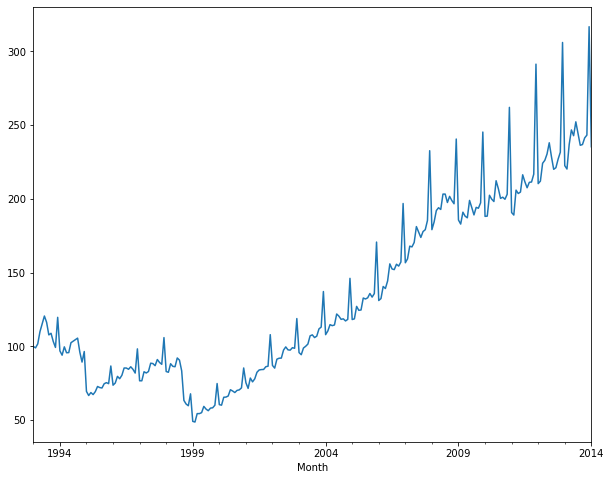

In [69]:
data.plot()

1. Визуально определите структурный сдвиг в данных (~изменение мат.ожидания). Удалите из данных период до структурного сдвига.

In [ ]:
# your code here

2. Для достижения регулярности во временном ряду попробуйте поделить значения на число дней в месяце. Стал ли ряд более регулярным?

In [ ]:
# your code here

3. Выполните STL-декомпозицию ряда и визуализируйте полученный результат. `sm.tsa.seasonal_decompose`

In [ ]:
# your code here

4. Для рядов с монотонно меняющейся дисперсией можно использовать стабилизирующие преобразования.Часто используют логарифмирование или любое другое параметрическое семейство стабилизирующих дисперсию преобразований (подсказка: Б-К :)))  ). Попробуйте минимизировать дисперсию в данных.

In [ ]:
# your code here

## Прогноз ARIMA

1. Используйте автоматическую настройку параметров ARIMA. 

In [ ]:
stepwise_model = auto_arima(data_bc, start_p=0, start_q=0, m=12,
                            seasonal=True, trace=True, error_action='ignore', 
                            suppress_warnings=True, stepwise=True)

2. Проанализируйте остатки модели. Для этого визуализируйте их и воспользуйтесь `sm.graphics.tsa.plot_acf` и `sm.graphics.tsa.plot_pacf`.

In [ ]:
# your code here

3. Проверьте наличие автокорреляции в остатках. Для этого используйте `sm.stats.acorr_ljungbox`.

In [26]:
lb_pvalue = # your code here

In [ ]:
plt.scatter(range(len(lb_pvalue)), lb_pvalue)
plt.show()

4. Проверьте остатки на нормальность. Для этого постройте гистограмму остатков и воспользуйтесь qqplot.

In [76]:
# your code here

5. Для точной проверки остатков на нормальность, несмещенность и стационарность используйте соотвествующие критерии. Для проверки на стационарность используйте `sm.tsa.stattools.kpss`.

In [ ]:
table_hypothesis = pd.DataFrame([['Нормальность', '???', '???', # your code here,
                     ['Несмещённость', '???', '???',# your code here,
                     ['Стационарность', 'KPSS', '???', # your code here)
table_hypothesis.columns = ['Гипотеза', 'Критерий', 'Результат проверки', 
                                           'Достигаемый уровень значимости']
table_hypothesis

## Ручной подбор модели

1. Проверьте ваши данные на стационарность. При необходимости используйте разности.

In [78]:
# your code here

2. Посмотройте на ACF и PACF полученного ряда. Согласно полученным результатам выберите начальную настройку для auto_arima и постройте её.

In [79]:
# your code here

3. Проанализируйте остатки новой модели.Получилось ли у вас улучшить модель?

In [ ]:
# your code here

4. Постройте предсказания для обеих моделей. Сравните полученные результаты прогноза между собой. Какая из моделей дает меньшую ошибку прогноза?

In [50]:
# your code here

In [52]:
plt.plot(data.append(test), label = 'Real wage')
plt.plot(test.index, # your code here, label = 'My predict')
plt.plot(test.index, # your code here, label = 'Auto predict')
plt.legend()
plt.show()

## Сравнение моделей

1. Сравните качество прогнозов с помощью теста Диболда-Мариано `dm_test`.

In [ ]:
dm_test(# your code here)

2. Постройте доверительный интервал для полученных предсказаний. Можно ли использовать теоретические доверительные интервалы или необходимо воспользоваться бутстреп-предсказательными интервалами?

In [ ]:
# your code here